In [28]:
import numpy as np

"""
def RK4s_step(pypt, t0, y0, dt):
    RK4_step does the Runga-Kutta 4 Method on a differential system for a single time step
    Inputs:
        pypt: callable function of form pypt(t, y)
        t0: current array of t
        y0: current array of y
        dt: time step size

    butcher_c = np.array([0, 1/2, 1/2, 1])
    butcher_b = np.array([1/6, 1/3, 1/3, 1/6])
    butcher_a = np.array([
        [0,   0, 0, 0],
        [1/2, 0, 0, 0],
        [0, 1/2, 0, 0],
        [0,   0, 1, 0],
    ])
    
    k = np.zeros(4)

    for a in range(0, 4):
        y_b = 0
        for b in range(0, a):
            y_b += butcher_a[a, b] * k[b]
        k[a] = dt * pypt(t0 + butcher_c[a] * dt, y0 + y_b)
    
    y1 = y0
    for a in range(0, a):
        y1 += butcher_b[a] * k[a]

    return y1
"""

def RK4s_step(pypt, t0, y0, dt):
    """
    RK4_step does the Runga-Kutta 4 Method on a differential system for a single time step
    Inputs:
        pypt: callable function of form pypt(t, y)
        t0: current array of t
        y0: current array of y
        dt: time step size
    """
    
    butcher_a = np.array([
        [0,   0, 0, 0],
        [1/2, 0, 0, 0],
        [0, 1/2, 0, 0],
        [0,   0, 1, 0],
    ])
    butcher_b = np.array([1/6, 1/3, 1/3, 1/6])
    butcher_c = np.array([0, 1/2, 1/2, 1])

    k1, k2, k3, k4 = 0, 0, 0, 0
    k1 = dt * pypt(t0 + butcher_c[0] * dt, y0 + butcher_a[0][0] * k)
    k2 = dt * pypt(t0 + butcher_c[1] * dt, y0 + butcher_a[1][0] * k1)
    k3 = dt * pypt(t0 + butcher_c[2] * dt, y0 + butcher_a[2][1] * k2)
    k4 = dt * pypt(t0 + butcher_c[3] * dt, y0 + butcher_a[3][2] * k3)

    y1 = y0 + k1/6 + k2/3 + k3/3 + k4/6
    return y1

"""
def RK4s_step(pypt, t0, y0, dt):
    
    RK4_step does the Runga-Kutta 4 Method on a differential system for a single time step
    Inputs:
        pypt: callable function of form pypt(t, y)
        t0: current array of t
        y0: current array of y
        dt: time step size
    
    
    k1 = dt * pypt(t0, y0)
    k2 = dt * pypt(t0 + dt/2, y0 + k1/2)
    k3 = dt * pypt(t0 + dt/2, y0 + k2/2)
    k4 = dt * pypt(t0 + dt, y0 + k3)

    y1 = y0 + k1/6 + k2/3 + k3/3 + k4/6
    return y1
"""

'\ndef RK4s_step(pypt, t0, y0, dt):\n    \n    RK4_step does the Runga-Kutta 4 Method on a differential system for a single time step\n    Inputs:\n        pypt: callable function of form pypt(t, y)\n        t0: current array of t\n        y0: current array of y\n        dt: time step size\n    \n    \n    k1 = dt * pypt(t0, y0)\n    k2 = dt * pypt(t0 + dt/2, y0 + k1/2)\n    k3 = dt * pypt(t0 + dt/2, y0 + k2/2)\n    k4 = dt * pypt(t0 + dt, y0 + k3)\n\n    y1 = y0 + k1/6 + k2/3 + k3/3 + k4/6\n    return y1\n'

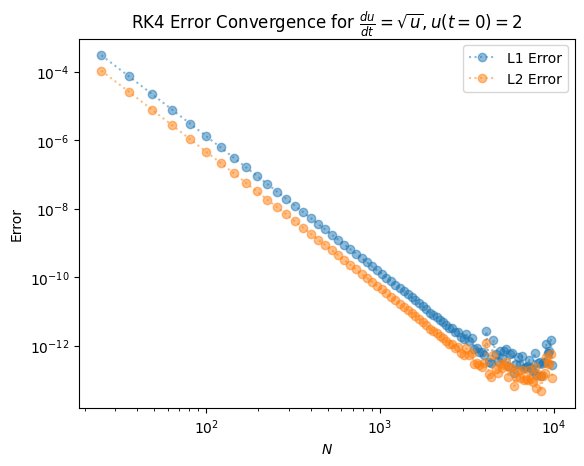

In [29]:
import matplotlib.pyplot as plt

def La_Norm(e, dx, a):
    N = len(e)
    La = 0
    for i in range(0, N):
        La += np.abs(e[i]) ** a
    La = (dx * La) ** (1/a)
    return La

def dudt(t, u):
    # return 1/u
    # return u
    return np.sqrt(u)

G = np.arange(5, 100) ** 2
l1_error = np.zeros(len(G))
l2_error = np.zeros(len(G))

for g in range(0, len(G)):
    t_dom = [0, 10]
    T = G[g]
    t = np.linspace(t_dom[0], t_dom[1], T, endpoint = False)
    dt = t_dom[1]/T

    u_num = np.empty(shape = (T))
    u_ana = np.empty(shape = (T))
    u_num[0] = 2
    u_ana[0] = 2

    for n in range(0, T - 1):
        u_num[n + 1] = RK4s_step(dudt, t[n], u_num[n], dt)
        
        # u_ana[n + 1] = np.sqrt(2 * t[n + 1] + 4)
        # u_ana[n + 1] = 2 * np.exp(t[n + 1])
        u_ana[n + 1] = (t[n + 1] + np.sqrt(8)) ** 2 / 4

    e = u_num - u_ana
    
    l1_error[g] = La_Norm(e, dt, 1)
    l2_error[g] = La_Norm(e, dt, 2)

plt.loglog(G, l1_error, ':o', label = "L1 Error", alpha = 0.5)
plt.loglog(G, l2_error, ':o', label = "L2 Error", alpha = 0.5)
plt.ylabel("Error")
plt.xlabel(r"$N$")
plt.legend()

# plt.title(r"RK4 Error Convergence for $\frac{du}{dt} = \frac{1}{u}, u(t = 0) = 2 $")
# plt.title(r"RK4 Error Convergence for $\frac{du}{dt} = u, u(t = 0) = 2 $")
plt.title(r"RK4 Error Convergence for $\frac{du}{dt} = \sqrt{u}, u(t = 0) = 2 $")

plt.show()